In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [16]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(42000, 785)

In [4]:
df.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29379,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32302,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14471,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13621,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


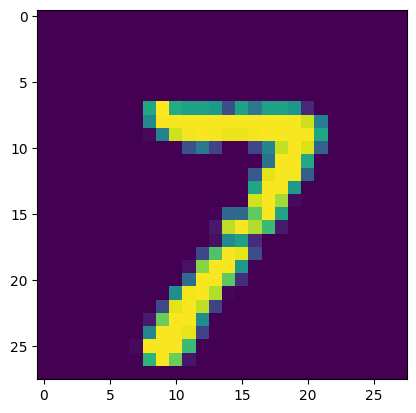

In [10]:
plt.imshow(df.iloc[14471,1:].values.reshape(28,28))

In [11]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
X_train.shape

(33600, 784)

In [17]:
knn = KNeighborsClassifier()

In [18]:
knn.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [19]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time()-start)

5.804454565048218


In [23]:
accuracy_score(y_test,y_pred)*100

96.48809523809524

## PCA

In [25]:
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
pca = PCA(n_components = 100)

In [44]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [45]:
X_train_trf.shape

(33600, 100)

In [46]:
knn = KNeighborsClassifier()

In [47]:
knn.fit(X_train_trf,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [48]:
y_pred = knn.predict(X_test_trf)

In [49]:
accuracy_score(y_test,y_pred)*100

95.44047619047619

In [50]:
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf,y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    print(accuracy_score(y_test,y_pred))

0.2580952380952381
0.3236904761904762
0.5104761904761905
0.6663095238095238
0.7378571428571429
0.8227380952380953
0.8436904761904762
0.8721428571428571
0.886547619047619
0.9055952380952381
0.9116666666666666
0.9184523809523809
0.9276190476190476
0.9351190476190476
0.9384523809523809
0.9379761904761905
0.9407142857142857
0.94
0.9425
0.9442857142857143
0.9438095238095238
0.9441666666666667
0.9442857142857143
0.9457142857142857
0.9484523809523809
0.9479761904761905
0.9478571428571428
0.9471428571428572
0.949047619047619
0.9491666666666667
0.9507142857142857
0.9513095238095238
0.95
0.9504761904761905
0.950952380952381
0.9519047619047619
0.9517857142857142
0.9527380952380953
0.9533333333333334
0.9528571428571428
0.9522619047619048
0.9522619047619048
0.9523809523809523
0.9533333333333334
0.9528571428571428
0.9530952380952381
0.9530952380952381
0.9533333333333334
0.9527380952380953
0.9533333333333334
0.9545238095238096
0.954047619047619
0.9541666666666667
0.9541666666666667
0.9546428571428571